# Object Orientation and Graphical User Interfaces

## Object Orientation

### Basics of Python Classes

In [1]:
class ExampleOne(object):
    pass

In [2]:
c = ExampleOne()

In [3]:
c.__str__()

'<__main__.ExampleOne object at 0x0000000003DB82E8>'

In [4]:
type(c)

__main__.ExampleOne

In [5]:
class ExampleTwo(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [6]:
c = ExampleTwo(1, 'text')

In [7]:
c.a

1

In [8]:
c.b

'text'

In [9]:
c.a = 100

In [10]:
c.a

100

In [11]:
c = ExampleOne()

In [12]:
c.first_name = 'Jason'
c.last_name = 'Bourne'
c.movies = 4

In [13]:
print c.first_name, c.last_name, c.movies

Jason Bourne 4


In [14]:
class ExampleThree(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def addition(self):
        return self.a + self.b

In [15]:
c = ExampleThree(10, 15)

In [16]:
c.addition()

25

In [17]:
c.a += 10
c.addition()

35

In [18]:
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [19]:
c = ExampleFour(10, 15)

In [20]:
c.addition()

25

In [21]:
class ExampleFive(ExampleFour):
    def multiplication(self):
        return self.a * self.b

In [22]:
c = ExampleFive(10, 15)

In [23]:
c.addition()

25

In [24]:
c.multiplication()

150

In [25]:
def multiplication(self):
        return self.a * self.b

In [26]:
class ExampleSix(ExampleFour):
    multiplication = multiplication

In [27]:
c = ExampleSix(10, 15)

In [28]:
c.addition()

25

In [29]:
c.multiplication()

150

In [30]:
class ExampleSeven(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.__sum = a + b
    multiplication = multiplication
    def addition(self):
        return self.__sum

In [31]:
c = ExampleSeven(10, 15)

In [32]:
c.addition()

25

In [33]:
c._ExampleSeven__sum

25

In [34]:
c.a += 10
c.a

20

In [35]:
c.addition()

25

In [36]:
c._ExampleSeven__sum

25

In [37]:
c.multiplication()

300

In [38]:
name_list = ['Sandra', 'Lilli', 'Guido', 'Zorro', 'Henry']

In [39]:
for name in name_list:
    print name

Sandra
Lilli
Guido
Zorro
Henry


In [40]:
class sorted_list(object):
    def __init__(self, elements):
        self.elements = sorted(elements)  # sorted list object
    def __iter__(self):
        self.position = -1
        return self
    def next(self):
        if self.position == len(self.elements) - 1:
            raise StopIteration
        self.position += 1
        return self.elements[self.position]

In [41]:
sorted_name_list = sorted_list(name_list)

In [42]:
for name in sorted_name_list:
    print name

Guido
Henry
Lilli
Sandra
Zorro


In [43]:
type(sorted(name_list))

list

In [44]:
for name in sorted(name_list):
    print name

Guido
Henry
Lilli
Sandra
Zorro


In [45]:
type(sorted_name_list)

__main__.sorted_list

### Simple Short Rate Class

In [46]:
import numpy as np
def discount_factor(r, t):
    ''' Function to calculate a discount factor.
    
    Parameters
    ==========
    r : float
        positive, constant short rate
    t : float, array of floats
        future date(s), in fraction of years;
        e.g. 0.5 means half a year from now
    
    Returns
    =======
    df : float
        discount factor
    '''
    df = np.exp(-r * t)
      # use of NumPy universal function for vectorization
    return df

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

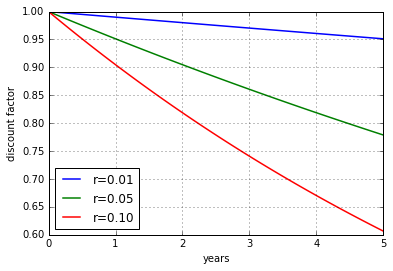

In [48]:
t = np.linspace(0, 5)
for r in [0.01, 0.05, 0.1]:
    plt.plot(t, discount_factor(r, t), label='r=%4.2f' % r, lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)
# tag: disc_fact_1
# title: Discount factors for different short rates over 5 years

In [49]:
class short_rate(object):
    ''' Class to model a constant short rate object.
    
    Parameters
    ==========
    name : string
        name of the object
    rate : float
        positive, constant short rate
    
    Methods
    =======
    get_discount_factors :
        returns discount factors for given list/array
        of dates/times (as year fractions)
    '''
    def __init__(self, name, rate):
        self.name = name
        self.rate = rate
    def get_discount_factors(self, time_list):
        ''' time_list : list/array-like '''
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [50]:
sr = short_rate('r', 0.05)

In [51]:
sr.name, sr.rate

('r', 0.05)

In [52]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0]  # in year fractions

In [53]:
sr.get_discount_factors(time_list)

array([ 1.        ,  0.97530991,  0.95122942,  0.93941306,  0.91621887,
        0.90483742])

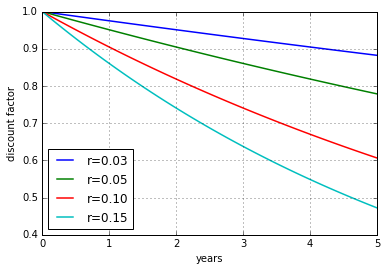

In [54]:
for r in [0.025, 0.05, 0.1, 0.15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t),
             label='r=%4.2f' % sr.rate, lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)
# tag: disc_fact_2
# title: Discount factors for different short rates over 5 years

In [55]:
sr.rate = 0.05
cash_flows = np.array([-100, 50, 75])
time_list = [0.0, 1.0, 2.0]

In [56]:
disc_facts = sr.get_discount_factors(time_list)

In [57]:
disc_facts

array([ 1.        ,  0.95122942,  0.90483742])

In [58]:
# present values
disc_facts * cash_flows

array([-100.        ,   47.56147123,   67.86280635])

In [59]:
# net present value
np.sum(disc_facts * cash_flows)

15.424277577732667

In [60]:
sr.rate = 0.15
np.sum(sr.get_discount_factors(time_list) * cash_flows)

-1.4032346276182679

### Cash Flow Series Class

In [61]:
class cash_flow_series(object):
    ''' Class to model a cash flows series.
    
    Attributes
    ==========
    name : string
        name of the object
    time_list : list/array-like
        list of (positive) year fractions
    cash_flows : list/array-like
        corresponding list of cash flow values
    short_rate : instance of short_rate class
        short rate object used for discounting
    
    Methods
    =======
    present_value_list :
        returns an array with present values
    net_present_value :
        returns NPV for cash flow series
    '''
    def __init__(self, name, time_list, cash_flows, short_rate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = short_rate
    def present_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows) * df
    def net_present_value(self):
        return np.sum(self.present_value_list())

In [62]:
sr.rate = 0.05
cfs = cash_flow_series('cfs', time_list, cash_flows, sr)

In [63]:
cfs.cash_flows

array([-100,   50,   75])

In [64]:
cfs.time_list

[0.0, 1.0, 2.0]

In [65]:
cfs.present_value_list()

array([-100.        ,   47.56147123,   67.86280635])

In [66]:
cfs.net_present_value()

15.424277577732667

In [67]:
class cfs_sensitivity(cash_flow_series):
    def npv_sensitivity(self, short_rates):
        npvs = []
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_present_value())
        return np.array(npvs)

In [68]:
cfs_sens = cfs_sensitivity('cfs', time_list, cash_flows, sr)

In [69]:
short_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]

In [70]:
npvs = cfs_sens.npv_sensitivity(short_rates)
npvs

array([ 23.01739219,  20.10770244,  15.42427758,  10.94027255,
         6.64667738,   2.53490386,  -1.40323463,  -8.78945889])

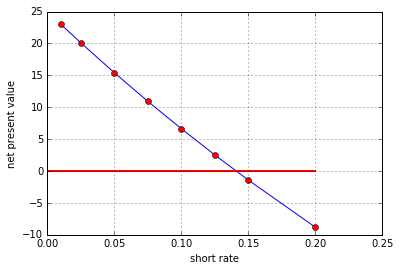

In [71]:
plt.plot(short_rates, npvs, 'b')
plt.plot(short_rates, npvs, 'ro')
plt.plot((0, max(short_rates)), (0, 0), 'r', lw=2)
plt.grid(True)
plt.xlabel('short rate')
plt.ylabel('net present value')
# tag: net_present_values
# title: Net present values of cash flow list for different short rates

## Graphical User Interfaces

### Short Rate Class with GUI

In [72]:
import numpy as np
#   conda install mayavi 
import traits.api as trapi


In [73]:
class short_rate(trapi.HasTraits):
    name = trapi.Str
    rate = trapi.Float
    time_list = trapi.Array(dtype=np.float, shape=(5,))
    def get_discount_factors(self):
        return np.exp(-self.rate * self.time_list)

In [74]:
sr = short_rate()

In [75]:
#remove sr.configure_traits()

In [76]:
sr.name = 'sr_class'
sr.rate = 0.05
sr.time_list = [0.0, 0.5, 1.0, 1.5, 2.0]

In [77]:
sr.rate

0.05

In [78]:
sr.time_list

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

In [79]:
sr.get_discount_factors()

array([ 1.        ,  0.97530991,  0.95122942,  0.92774349,  0.90483742])

### Updating of Values

In [80]:
#remove sr.configure_traits()

### Cash Flows Series Class with GUI

In [81]:
#remove cfs.configure_traits()

## Conclusions

## Further Reading